In [1]:
import string
import operator
import pandas as pd
import numpy as np

# pickle is a built-in library in Python that allows us to save variables to our hard drive, then load them back 
import pickle as pk

from wordcloud import WordCloud
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.stem.porter import PorterStemmer #stem words
from nltk.tokenize import word_tokenize    #split text into tokens by words and punctutation
from nltk.probability import FreqDist      #frequency count for tokens 
from nltk.stem import WordNetLemmatizer    #lemmatize words to dictionary form
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')  
stopwords = set(en_stopwords)

from sklearn.feature_extraction.text import TfidfVectorizer  #create TF-IDF model matrix from corpus input
from sklearn.metrics.pairwise import cosine_similarity       #find cosine similarities to documents in corpus

In [2]:
#chapters is a list
#each item in the list is a chapter of the book
chapters = pk.load(open('wizard_of_oz_stories.pk', 'rb'))

In [3]:
#there are 6 chapters in the book
len(chapters)

6

In [4]:
#data structure type in each chapter item is a string of text
type(chapters[0])

str

In [5]:
# Chapter 1
#first 100 characters of string text
chapters[0][:100]

'In the splendid palace of the Emerald City, which is in the center of the fairy Land of Oz, is a gre'

In [6]:
# chapter 2
chapters[1][:100]

'Dorothy was a little Kansas girl who once accidentally found the beautiful Land of Oz and was invite'

***

## Week 2 Assignment

### Summary:

Using the `clean_text` function from last week, I made a modification to comment out the `print` action before lowercasing, removing punctuation/digits, stemming/lemmatizing, and removing stopwords. This is because I added the `clean_text` function to another function called `tknzCorpus`, which takes in the entire corpus and iterates through each document, so I did not want the output cluttered with too many `print` statements. Within each document, the `tknzCorpus` function runs the `clean_text` function on the text then tokenizes the words in the document, and stores the list of tokens from the documents into a new list for the corpus called `clean_doc`. At the end of the text processing stage for each document, the function will print out `Document __ cleaned` and will proceed to the next one until all the documents in the corpus have been cleaned.

In [7]:
#start with clean_text function from Week 1 assignment

#lemmatize function is set to false by default; pass True to lemmatize words
#parts of speech arguments that can be passed:
#ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
#parts of speech tag references sourced from: 
#https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python

def clean_text(document, lemmatize=False, pos=None): 
    """
    cleans text for analysis
    
    - lowercases
    - removes punctuation and numbers
    - lemmatizes or stems
    - removes stopwords
    """
    # lowercase text
    #print('lowercasing')
    # use the .lower method of strings to lowercase the document
    # https://docs.python.org/3/library/stdtypes.html#str.lower
    lowercased_doc = document.lower()
    
    #print('removing punctuation/numbers')
    # remove punctuation and numbers using the "String constants" from the string library:
    # https://docs.python.org/3/library/string.html#string-constants
    # do this before stemming, so things like "act's" turn into 'act' instead of 'act s'
    table = str.maketrans({key: None for key in string.punctuation + string.digits + "‘" + "’"})
    
    # use the 'translate' method on each of the docs to remove punctuation
    # here is an example: https://stackoverflow.com/a/34294398/4549682
    clean_document = lowercased_doc.translate(table)
    
    # stem words -- basically chop off the ends
    
    stemmer = PorterStemmer()
    wnl = WordNetLemmatizer()
    
    stems = []
    
    # use the split method of strings to split the document (at spaces) into words:
    # https://docs.python.org/3/library/stdtypes.html#str.split
    # this will also remove extra spaces at the ends and beginnings of words
    words = clean_document.split()
    
    #will print the status of either doing lemmitization or stemming
    #based on argument passed in clean_text
    #if lemmatize==True: print("lemmatizing")
    #else: print("stemming")
    
    for w in words:
        
        if lemmatize==True:
            if pos != None:
            #lemmatize using part of speech passed in function argument
                stems.append(wnl.lemmatize(w, pos=pos))
            
            else: #default part of speech is noun
                stems.append(wnl.lemmatize(w))
            
        # stem the word with the stemmer, and add to the 'stems' list:
        # http://www.nltk.org/howto/stem.html
        else:
            stems.append(stemmer.stem(w))

    clean_document = stems
    
    # remove stopwords
    #print('removing stopwords')
    # this is the list comprehension way to do it
    # clean_document = [w for w in clean_document if w not in stopwords]
    
    clean_words = []
    for w in clean_document:
        # make sure the word is not in the stopword set
        # remember -- we created the 'stopwords' variable in the cell above
        if w not in stopwords:
            clean_words.append(w)
    
    """
    join tokens back into a single string with the .join() method of strings:
    https://www.tutorialspoint.com/python/string_join.htm
    https://docs.python.org/3/library/stdtypes.html#str.join
    You will want to join the strings with a single space.
    """
    clean_document = " ".join(clean_words)
    
    # return the clean document
    return clean_document

In [8]:
def tknzCorpus(corpus, doc_num=1):
    #doc_num variable will keep track of which documents have been cleaned
    
    #create empty list to hold all tokens in corpus
    clean_corpus = []

    for doc in corpus:
    
        #text process each document
        #clean_doc is a string
        clean_doc = clean_text(doc)
    
        #tokenize each cleaned document
        #tknz_ls is a list
        tknz_ls = word_tokenize(clean_doc)
    
        #add list of tokens from document to clean_corpus list
        clean_corpus.append(tknz_ls)
        
        #confirmation for each document number cleaned
        print("Document {} cleaned".format(doc_num))
        doc_num += 1
    
    #returned output is a list with document tokens list from corpus
    return clean_corpus

In [9]:
#use tknzChapters function on the loaded pickled chapters
#will clean and tokenize words in corpus
#produces a list where each list item is a list of chapter tokens
chapls_tokens = tknzCorpus(chapters)

Document 1 cleaned
Document 2 cleaned
Document 3 cleaned
Document 4 cleaned
Document 5 cleaned
Document 6 cleaned


In [10]:
#corpus_tknz is a list
#will iterate through each chapter and extract tokens
#will put into single list, each token is an item
corpus_tknz = [token for chapter in chapls_tokens for token in chapter]

In [11]:
#verify first 5 items in corpus_tknz list
corpus_tknz[:5]

['splendid', 'palac', 'emerald', 'citi', 'center']

#### Inspect Terms

For this exercise, I used the `corpus_tknz` list, which contains all the tokens from the corpus as individual items and made a frequency distribution `key:value` map. Then I iteratd through the values for each token (word) and if it had an occurance between 10 and 50, then it was added to a new dictionary called `middle_freq`. I could then inspect the top 5 words in the middle frequency of the corpus, which allows me to find terms that are outside the stopwords high frequency range but are still relevant to the document by being somewhat frequently occuring but not being too irrelevant  from the low frequency end of the distribution. I also did a `len` function on the middle frequency terms to get a count of how many words were within the range.

In [12]:
#word count of tokens in entire corpus
#freq_ls behaves as a dictionary
freq_ls = FreqDist(corpus_tknz)

In [13]:
#create dictionary that only holds words with a frequency between 10 & 50
middle_freq = {}

for k, v in freq_ls.items():
    if (v >= 10) & (v <= 50):
        middle_freq[k] = v

In [14]:
#sort middle frequency words in descending order
#sorted_midfreq is a list of tuples
sorted_midfreq = sorted(middle_freq.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
#verify first 5 items in sorted list
sorted_midfreq[:5]

[('wizard', 48), ('littl', 45), ('man', 44), ('ozma', 41), ('head', 41)]

In [16]:
#sorted_midfreq has 120 words w/ count
len(sorted_midfreq)

120

In [17]:
#inspect all items in sorted_midfreq list
sorted_midfreq

[('wizard', 48),
 ('littl', 45),
 ('man', 44),
 ('ozma', 41),
 ('head', 41),
 ('scarecrow', 38),
 ('would', 37),
 ('thi', 36),
 ('king', 36),
 ('tin', 34),
 ('upon', 32),
 ('jack', 31),
 ('dorothi', 30),
 ('oz', 29),
 ('tiktok', 29),
 ('lion', 29),
 ('tiger', 28),
 ('imp', 27),
 ('im', 26),
 ('good', 26),
 ('girl', 25),
 ('eye', 25),
 ('tree', 25),
 ('could', 24),
 ('babi', 22),
 ('two', 21),
 ('friend', 21),
 ('get', 21),
 ('ask', 21),
 ('made', 21),
 ('nome', 21),
 ('much', 20),
 ('found', 20),
 ('woodman', 19),
 ('button', 19),
 ('look', 18),
 ('veri', 18),
 ('big', 18),
 ('back', 18),
 ('right', 18),
 ('magic', 18),
 ('crinklink', 18),
 ('must', 18),
 ('kaliko', 18),
 ('sawhors', 18),
 ('go', 17),
 ('away', 17),
 ('see', 17),
 ('toto', 17),
 ('forest', 17),
 ('crow', 17),
 ('tri', 16),
 ('piec', 16),
 ('like', 16),
 ('water', 16),
 ('boat', 16),
 ('land', 15),
 ('princess', 15),
 ('us', 15),
 ('take', 15),
 ('cri', 15),
 ('way', 15),
 ('path', 15),
 ('three', 15),
 ('around', 14),


#### Word Cloud

Using the `wordcloud` library, I used the `WordCloud` function to set the background color for the word cloud and then the `generate` function took in the words to create the font size for each word according to its frequency in the corpus. The words I passed into the `generate` function had to be a string, so I first joined all the words from the `corpus_tknz` list as one string value with each word separated by a whitespace. Then using the `matplotlib` library, I plotted the word cloud image to produce the representation of word frequency by font size.

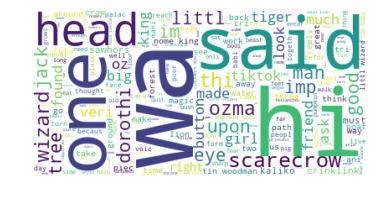

In [18]:
#make a word cloud from cleaned text

#make a string of all tokens
#WordCloud function will only take string
wc_str = " ".join(corpus_tknz)

#generate word cloud image
wordcloud = WordCloud(background_color="white").generate(wc_str)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### TF-IDF with Cosine Similarity

From the Scikit-Learn library (`sklearn`), I imported the `TfidfVectorizer` function to create a term frequency-inverse document frequency matrix. Using the `fit_transform` function with the vectorizer, it generated a matrix containing each document as a row and the terms in the document as the columns, and each term gets a TF-IDF score for every document. After building the TF-IDF matrix, I then passed in a query document to the matrix to create a matrix with TF-IDF scores for the document across all the terms that were in the original corpus. With the corpus matrix and query matrix, I used the `cosine_similarity` function from the `sklearn` library to determine the relevance of each document to the query. I also created a dataframe that holds the cosine similarity values for the documents compared to the query.

In [19]:
#initialize TF-IDF vectorizer function
tvec = TfidfVectorizer()

In [20]:
#create TF-IDF matrix based on terms in each chapter
tmtx = tvec.fit_transform(chapters)

C:\Users\Nisha\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [21]:
#verify output is a matrix
tmtx

<6x1990 sparse matrix of type '<class 'numpy.float64'>'
	with 3610 stored elements in Compressed Sparse Row format>

In [22]:
#6 documents (chapters) with 1,990 distinct words
tmtx.shape

(6, 1990)

In [23]:
#tuple of (doc, term) where doc is document number it belongs to (chapter 1 = 0)
#3rd value is TF-IDF score
print(tmtx)

  (0, 841)	0.1114968107014252
  (0, 1710)	0.6085867584119459
  (0, 1579)	0.008581992493697493
  (0, 1175)	0.021447353311603502
  (0, 1137)	0.15330811471445965
  (0, 508)	0.01608551498370263
  (0, 286)	0.026809191639504376
  (0, 1914)	0.01393710133767815
  (0, 865)	0.0557484053507126
  (0, 264)	0.005361838327900876
  (0, 559)	0.01241769933118881
  (0, 920)	0.005361838327900876
  (0, 1169)	0.0278742026753563
  (0, 708)	0.0278742026753563
  (0, 1740)	0.060073947455882445
  (0, 1390)	0.018626548996783215
  (0, 1912)	0.0278742026753563
  (0, 1253)	0.01241769933118881
  (0, 1170)	0.03725309799356643
  (0, 1404)	0.007245507761432913
  (0, 622)	0.07433120713428347
  (0, 57)	0.021447353311603502
  (0, 807)	0.017163984987394985
  (0, 488)	0.01241769933118881
  (0, 392)	0.010723676655801751
  :	:
  (5, 1895)	0.007947684370113471
  (5, 1358)	0.007947684370113471
  (5, 99)	0.007947684370113471
  (5, 1420)	0.007947684370113471
  (5, 921)	0.007947684370113471
  (5, 199)	0.015895368740226942
  (5, 225

In [24]:
#new query as a list
query = ["scarecrow"]

#transform query to corpus matrix structure
qvmx = tvec.transform(query)

C:\Users\Nisha\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [25]:
#verify column number matches TF-IDF matrix
qvmx.shape

(1, 1990)

In [26]:
#calculate cosine similarity of query to documents in TF-IDF matrix
cos_sim = cosine_similarity(qvmx, tmtx).flatten()

In [27]:
#document similarity relation in order
#Top 3 most related documents are 5, 0, & 4 (Chapters 6, 1, & 5)
cos_sim.argsort()[::-1]

array([5, 0, 4, 3, 2, 1], dtype=int64)

In [28]:
#dataframe of cosine similarity values
pd.DataFrame(cosine_similarity(qvmx, tmtx), columns = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6'])

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6
0,0.008582,0.0,0.0,0.0,0.0,0.241137


In [29]:
#my query of choice
#new query as a list
my_query = ["red"]

#transform query to corpus matrix structure
mqvmx = tvec.transform(my_query)

C:\Users\Nisha\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [30]:
#verify column number matches TF-IDF matrix
mqvmx.shape

(1, 1990)

In [31]:
#calculate cosine similarity of query to documents in TF-IDF matrix
mq_cos_sim = cosine_similarity(mqvmx, tmtx).flatten()

In [32]:
#document similarity relation in order
#Top 3 most related documents are 2, 5, & 4 (Chapters 3, 6, & 5)
mq_cos_sim.argsort()[::-1]

array([2, 5, 4, 3, 1, 0], dtype=int64)

In [33]:
#dataframe of cosine similarity values
pd.DataFrame(cosine_similarity(mqvmx, tmtx), columns = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6'])

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6
0,0.0,0.0,0.009215,0.0,0.0,0.006517


### Conclusion:

Based on the output of the `clean_text` function from last week's assignment, I ran a quick test on the word "was" with the `PorterStemmer` function and determined that it was being very aggressive in stemming this word (`was -> wa`). This led me to see "wa" as the most frequently occuring word in my corpus when looking at the output of the word cloud. Because of the aggressive stemming on that word, it was also not recognized as a stopword and therefore was not removed during the text processing stage.  

When inspecting the middle frequency terms, the top 5 words were wizard, littl (little), man, ozma, and head. This seems to suggest that the more relevant terms in the corpus are about the character of the wizard and the munchkins (little men) that appear in the story. As the main character of the story, Dorothy (as a term) may have had a higher frequency and therefore was not captured in the middle frequency terms, despite having relevance in the corpus.

In the output for the word cloud, the most frequently occuring words (biggest fonts) were wa, hi, said, one, and head - all of which are not very informative. I could probably get a better sense of the terms in the document from the word cloud if I removed these words and then saw which terms appeared in the new word cloud.

When computing cosine similairty for the query document "scarecrow", I found that the two most relevant documents were Chapters 6 and 1, with all the other documents having a cosine similarity of 0. Then I choose the query "red" (to find out where Dorothy's red shoes were most relevant) and found the cosine similarity was highest for Chapters 3 and 6, with all other chapters having a cosine similarity of 0.

Overall, the most difficult portion of the assignment was creating my query into a TF-IDF matrix that was the same shape as the corpus matrix in order to do the cosine similarity. From the StackOverflow link provided in the discussion section for this assignment, I actually found the answer from Paul Ogier (and edited by dimid) to be the most useful in getting the proper output in addition to a lab assignment exercise from the Spring 2014 CompSci290 course at Duke University. 

## Bonus Exercises

#### Term Frequency by Chapter

Using the list of tokens for each chapter (`chapls_token`), I iterated through each list and created a frequency distribution word:frequency map then stored the top 5 (5 most common) terms into a variable to print to output. From the Top 5 list from each chapter, there seems to be a change in focus of characters, so the frequency of particular terms does not seem to be constant throughout the corpus documents.

In [34]:
#create FreqDist with Top 10 words from each chapter
chap = 1

for chapter in chapls_tokens:
    
    print("Chapter {} Top 5 words:".format(chap))
    
    top5 = FreqDist(chapter).most_common(5)
    
    for word in top5:
        print(word[0])
        
    chap +=1
    
    print("\n")

Chapter 1 Top 5 words:
tiger
lion
babi
said
one


Chapter 2 Top 5 words:
dorothi
wa
crinklink
toto
said


Chapter 3 Top 5 words:
king
hi
tiktok
wa
nome


Chapter 4 Top 5 words:
wizard
imp
ozma
wa
magic


Chapter 5 Top 5 words:
wa
jack
sawhors
hi
head


Chapter 6 Top 5 words:
scarecrow
wa
tin
hi
woodman




#### Word Cloud using Image Mask

Although I loaded the image file into a numPy array, I was unsuccessful in generating a word cloud that was in the shape of the `wiz_oz.png` file provided. I attempted several modifications of the code from various tutorials but could not get the expected output. [One person on StackOverflow](https://stackoverflow.com/questions/50435433/wordcloud-words-not-fitting-to-mask) was able to answer their own question regarding their image mask not working correctly, and found that the file type and image size were the reason why their word cloud mask did not work properly. However, since this file was provided for our course, I'm not sure if the issue is with the image file, since I supposed this has already successfully been used as a word cloud mask.

In [35]:
#load image as numPy array
wiz_mask = np.array(Image.open("wiz_oz.png"))
type(wiz_mask)

numpy.ndarray

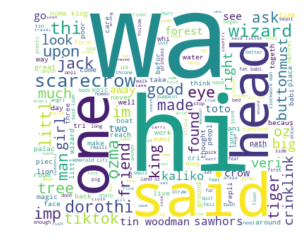

In [36]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
wc = WordCloud(background_color="white", mask=wiz_mask)

# generate word cloud
wc.generate(wc_str)

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

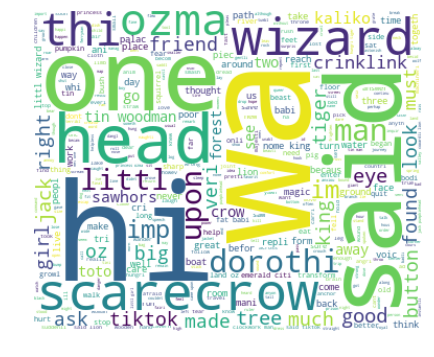

In [37]:
#https://medium.com/@dudsdu/an-example-of-word-cloud-with-mask-4cbbd699fb14

wordcloud = WordCloud(background_color="white", mask=wiz_mask, max_words=1000).generate(wc_str)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

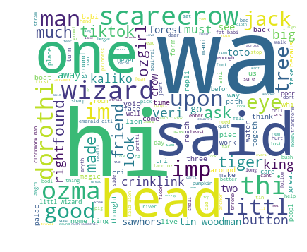

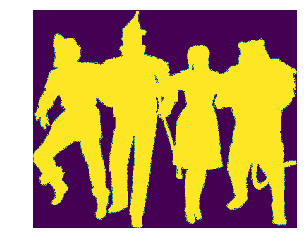

In [38]:
#https://automatemylife.org/2016/12/part-3-creating-the-wordcloud/

wc = WordCloud(background_color="white", mask=wiz_mask)

# generate word cloud
wc.generate(wc_str)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(wiz_mask)
plt.axis("off")
plt.show()

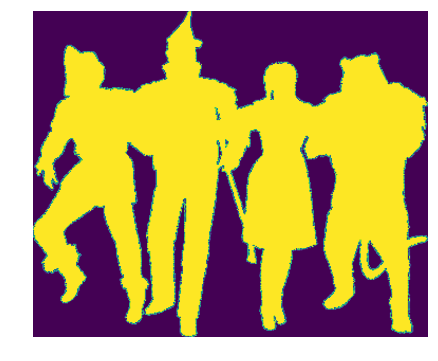

In [39]:
#https://github.com/amueller/word_cloud/blob/master/examples/masked.py

wc = WordCloud(background_color="white", mask=wiz_mask)

# generate word cloud
wc.generate(wc_str)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.imshow(wiz_mask, interpolation='bilinear')
plt.show()

## References:

Bengfort, B., Bilbro, R., & Ojeda, T. (2018). *Chapter 4: Text Vectorization and Transformation Pipelines. Applied text analysis with Python: Enabling language-aware data products with machine learning (pp.64)*. Sebastopol, CA: OReilly Media.

Lab #2: Document Similarity using NLTK and Scikit-Learn. Retrieved from https://www2.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

Python: Tf-idf-cosine: To find document similarity. Retrieved from https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity/18914884#18914884